In [1]:
import numpy as np

# def grad(x, return_value):
    
#     denominator = np.dot(return_value, x)
#     return - return_value/np.dot(r_t, x)

def grad_new(x, return_value):
    df_dx = []

    for i in range(490):
        delta_val = 0
        for j in range(1000):
            denominator = np.dot(return_value[:,j], x)
            delta_val += return_value[i,j]/denominator
        df_dx.append(-delta_val)
    return df_dx


def projection(x):
    v = np.sort(x)[:: -1]
    t2 = []
    for i in range(len(v)):
        t1 = v[i] + (1 - np.sum(v[:i+1]))/(i+1)
        if t1 >0:
            t2.append(i +1)
    t2 = np.asarray(t2)
    rho = np.max(t2)
    lamb = (1 - np.sum(v[: rho]))/rho
    k = np.maximum(x+lamb, 0)
    return k

def get_return(x, data):
    return_value = 1
    for i in range(data.shape[1]) :
        return_value *= np.dot(data[:, i].transpose(), x)
    return return_value

In [5]:
# def proj_grad_descent(return_value, x , eta, data):
# #     log = list ()
#     r_t = np.divide ( data [: , 999], data [: , 1])
#     for _ in range(10) :
#         t1 = x - eta * grad(x, r_t)
#         t = projection(t1)
#         print(sum(t))
#         x = t
#         ret_ = get_return(x, data)
#     return x, ret_

In [29]:
import matplotlib.pyplot as plt

def second_part():
    data = np.genfromtxt('stockData.csv', delimiter=',')
    return_value = np.zeros_like(data)
    old_data = data[:, 0]
    for i in range(1000):
        return_value[:, i] = data[:, i]/old_data
        old_data = data[:, i]
    n = len(data)
    x = [1/ n ]*n  # equal distribution - initialisation
    eta_array = [0.02]  # [0.01, 0.05, 0.1, 0.5]
    for eta in eta_array:
        xs = [[1/ n ]* n]
        returns = []
        for step in range(10) :
            t1 = x - eta * np.array(grad_new(x, return_value))
            t = projection(t1)
            x = t
            print(sum(x))
            returns.append(get_return(x, data))
        plt.plot(returns)
        plt.show()
        print(returns[-1])
    return x

1.0000000000001243


/Users/parulgupta/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:36: RuntimeWarning: overflow encountered in double_scalars


0.999999999999897
1.000000000000007
0.9999999999999503
1.0000000000000426
1.000000000000071
0.9999999999998508
0.9999999999999716
0.9999999999999041
1.0000000000001315


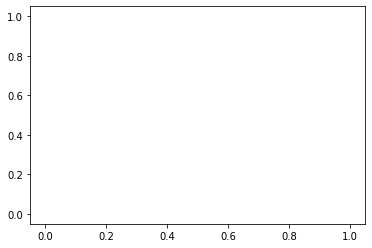

inf


In [30]:
x = second_part()

In [2]:
# data = np.genfromtxt('stockData.csv', delimiter=',')
# return_value = np.zeros_like(data)
# old_data = data[:, 0]
# for i in range(1000):
#     return_value[:, i] = data[:, i]/old_data
#     old_data = data[:, i]
# return_value.shape

(490, 1000)

In [8]:
x = [1/ len(data) ]*len(data)
len(x)

490

In [31]:
for i in range(len(x)):
    if x[i] > 0:
        print(i, x[i])

1 0.11877961846542817
16 0.03796388740031986
20 0.08886427935946628
78 0.008769026319392026
112 0.16274477920943653
128 0.12524138101919746
163 0.00680855809456915
168 0.015073342289408487
174 0.0397180393086316
210 0.06496413574056703
228 0.02050367458156188
248 0.01954209904397075
249 0.0047736300733625114
350 0.018523975515677193
360 0.017287785820787605
418 0.027070685211938894
459 0.0697371794362418
471 0.009141694114916277
485 0.08813823024475198
486 0.05635399875050595


In [11]:
data = np.genfromtxt('stockData.csv', delimiter=',')
return_value = np.zeros_like(data)
old_data = data[:, 0]
for i in range(1000):
    return_value[:, i] = data[:, i]/old_data
    old_data = data[:, i]
n = len(data)
get_return(x, data)

/Users/parulgupta/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:36: RuntimeWarning: overflow encountered in double_scalars


inf

In [28]:
print(np.dot(data[:, 1], x))
print(np.dot(data[:, 112], x))
print(np.dot(data[:, 128], x))
print(np.dot(data[:, 2], x))

6.048907716717579
9.08743367447648
9.277799178573199
6.039247607859846


In [20]:
(6.048907716717579 + 9.08743367447648 + 9.277799178573199)/3

8.138046856589087

In [15]:
x.shape

(490,)

In [22]:
def get_top_stocks(sorted_index):
    with open("stockNames.csv", "r") as f:
        stocks = f.readline()
        stock_list = stocks.split(",")
    top_10_stocks = [stock_list[i[0]] for i in sorted_index][0:10]
    top_10_values = [i[1] for i in sorted_index][0:10]
    return top_10_stocks, top_10_values

sort_index = [(i[0], i[1]) for i in sorted(enumerate(x), 
                                           key=lambda y:y[1], 
                                           reverse=True)]
# ret_ = get_return(x, data)
best_stocks, best_values = get_top_stocks(sort_index)

In [23]:
best_stocks, best_values

(['COH', 'CVH', 'AAPL', 'AA', 'ABC', 'ABI', 'ABK', 'ABS', 'ABT', 'ACE'],
 [0.6330789142493245,
  0.23554162721268312,
  0.13137945853799238,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0])

In [32]:
np.multiply.reduce(np.dot(data.transpose(), x))

/Users/parulgupta/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: overflow encountered in reduce
  """Entry point for launching an IPython kernel.


inf